## Linear regression for multiple variables: An example using Python 3 with [numpy](http://www.numpy.org/) and [matplotlib](http://matplotlib.org/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Only necessary if you have a HiDPI display
%config InlineBackend.figure_format = 'retina'

Below are the vectorized forms of the linear regression hypothesis $h_\theta(X)$, cost function $J(\theta)$, and the gradient descent algorithm. 

Hypothesis:

$h_\theta(X) = \theta^T X$

Cost function:

$J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T (X\theta - \vec{y})$

Gradient descent:

$\theta := \theta - \frac{\alpha}{m}X^T(X\theta - \vec{y})$

Where $X$ is the feature matrix containing $m$ examples, $\theta$ is a column vector of model parameters, $\vec{y}$ is the column vector of outputs, and $\alpha$ is the learning rate.

First, we will define functions for each equation and algorithm.

In [2]:
def hypothesis(theta, X):
    return theta.T * X

def calculate_cost(theta, X, y):
    m = X.shape[0]
    J = (1.0 / (2.0 * m)) * (X * theta - y).T * (X * theta - y)
    return J

def gradient_descent(initial_theta, X, y, alpha=0.1, maxiter=100, tol=0.1, return_costs=False):
    m = X.shape[0]
    i = 0
    theta = initial_theta
    costs = []
    while i < maxiter:
        theta = theta - (alpha / m) * X.T * (X * theta - y)
        cost = calculate_cost(theta, X, y)
        costs.append(float(cost))
        if cost <= tol:
            if return_costs:
                return theta, costs
            else:
                return theta
        i = i + 1
    if return_costs:
        return theta, costs
    else:
        return theta

Next, we will define initial guess of $\theta$ (all zeros), $X$ (based on two features, called $x_1$ and $x_2$ here), and $y$.

In [3]:
n_pts = 100

x1 = np.linspace(0,5,n_pts)
x2 = np.linspace(0,10,n_pts)

initial_theta = np.matrix([np.zeros(3)]).T
X = np.matrix([np.ones(len(x1)), x1, x2]).T
y = np.matrix(np.random.rand(n_pts)*5 + np.linspace(0,15,n_pts)).T

Run the gradient descent algorithm using the initial guess of $\theta$ on $X$ with outputs $y$.

In [4]:
theta, costs = gradient_descent(initial_theta, X, y, alpha=0.01, tol=0.001, maxiter=100, return_costs=True)

This yields the final model parameters $\theta$ as well as the cost function $J(\theta)$ as a function of iteration number.

In [5]:
print(theta)

[[ 0.71120206]
 [ 0.71121289]
 [ 1.42242578]]


In [6]:
print(costs)

[21.352703178500235, 8.21097002815335, 3.8832278710423624, 2.456681709117456, 1.9850943314232798, 1.827848317140997, 1.7740799837209944, 1.754382048991971, 1.7459085785915083, 1.7411396264297194, 1.7375999011631456, 1.734474594516587, 1.7314954578871855, 1.7285741467924403, 1.7256815336710687, 1.7228079828597374, 1.719950274827107, 1.717107302194297, 1.7142786530492247, 1.711464144633578, 1.7086636698515063, 1.705877146745728, 1.7031045018660842, 1.700345664794015, 1.6976005663391085, 1.694869137944339, 1.6921513114891447, 1.6894470192234838, 1.6867561937449949, 1.6840787679903566, 1.6814146752313253, 1.6787638490723125, 1.676126223448492, 1.6735017326240613, 1.6708903111905824, 1.6682918940653413, 1.6657064164897255, 1.6631338140276015, 1.6605740225637182, 1.6580269783021022, 1.6554926177644727, 1.6529708777886547, 1.6504616955270064, 1.6479650084448554, 1.6454807543189363, 1.643008871235845, 1.6405492975904905, 1.638101972084562, 1.6356668337249995, 1.6332438218224776, 1.630832875989

We can compare the results from gradient descent with the optimal $\theta$ as calculated using the normal equation:

$\theta = (X^T X)^{-1} X^T y$

In [7]:
theta_from_norm = np.linalg.pinv(X.T * X) * X.T * y
print(theta_from_norm)

[[ 2.43528902]
 [ 0.6076711 ]
 [ 1.2153422 ]]


Now let's visualize the results using the theta we obtained from gradient descent.

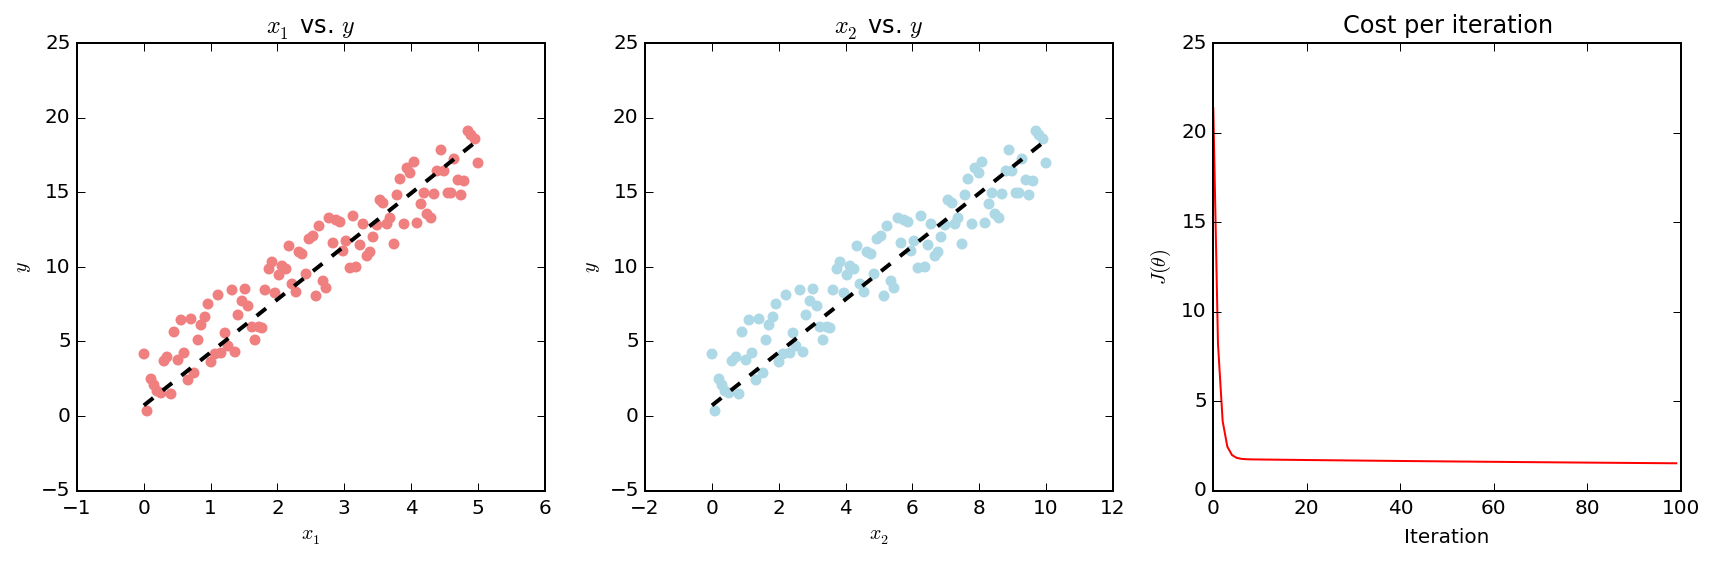

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

x1 = np.linspace(X[:,1].min(), X[:,1].max(), 100)
x2 = np.linspace(X[:,2].min(), X[:,2].max(), 100)

ax[0].plot(x1, theta.item(0) + theta.item(1)*x1 + theta.item(2)*x2, color='k', lw=2, ls='--')
ax[0].scatter(X[:,1], y, color='lightcoral')
ax[0].set_title('$x_1$ vs. $y$')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$y$')

ax[1].plot(x2, theta.item(0) + theta.item(1)*x1 + theta.item(2)*x2, color='k', lw=2, ls='--')
ax[1].scatter(X[:,2], y, color='lightblue')
ax[1].set_title('$x_2$ vs. $y$')
ax[1].set_xlabel('$x_2$')
ax[1].set_ylabel('$y$')

ax[2].plot(costs, color='r')
ax[2].set_title('Cost per iteration')
ax[2].set_xlabel('Iteration')
ax[2].set_ylabel(r'$J(\theta)$')

fig.tight_layout()

In the above plots we can see that the model parameters we found fit the data, but probably could be better. You can see that the model (the dashed black line) goes from underestimating our data with where $x_1$ and $x_2$ is low and overestimates our data where $x_1$ and $x_2$ are high. However, we know gradient descent is converging as the cost function $J(\theta)$ is decreasing with each iteration. We could probably get a better fit by either running our gradient descent algorithm for more iterations or increasing our learning rate $\alpha$. If we take one of these approaches, we might also want to decrease the tolerance as well.

Let's now generate the same plots except this time using the values for $\theta$ that we obtained using the normal equation.

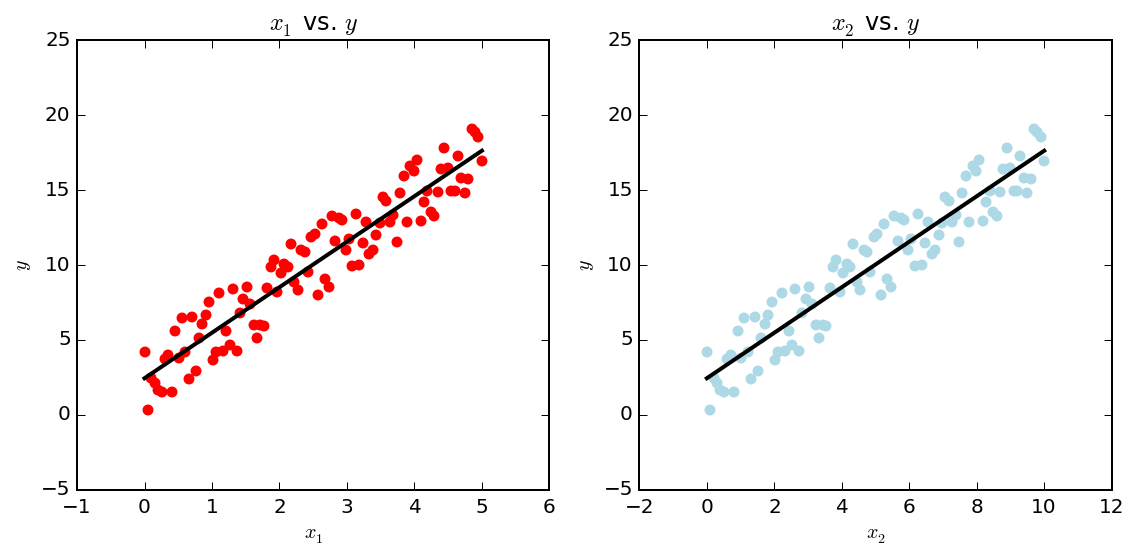

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

theta = theta_from_norm

x1 = np.linspace(X[:,1].min(), X[:,1].max(), 100)
x2 = np.linspace(X[:,2].min(), X[:,2].max(), 100)

ax[0].plot(x1, theta.item(0) + theta.item(1)*x1 + theta.item(2)*x2, color='k', lw=2)
ax[0].scatter(X[:,1], y, color='r')
ax[0].set_title('$x_1$ vs. $y$')
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$y$')

ax[1].plot(x2, theta.item(0) + theta.item(1)*x1 + theta.item(2)*x2, color='k', lw=2)
ax[1].scatter(X[:,2], y, color='lightblue')
ax[1].set_title('$x_2$ vs. $y$')
ax[1].set_xlabel('$x_2$')
ax[1].set_ylabel('$y$')

fig.tight_layout()

The model parameters obtained from the normal equation fit the data much better. However, the drawback to using the normal equation is that it becomes computationally expensive when the training data $X$ has a large amount of features or a large number of examples.